In [9]:
import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

In [4]:
df = pandas.read_csv("data/data.csv")
print(df.head())

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY


In [5]:
#Change string values into numerical values:
d = {'M': 1, 'F': 0}
df['Sex'] = df['Sex'].map(d)

d = {'HIGH': 0, 'LOW': 1, 'NORMAL': 2}
df['BP'] = df['BP'].map(d)

d = {'HIGH': 0, 'LOW': 1, 'NORMAL': 2}
df['Cholesterol'] = df['Cholesterol'].map(d)
print(df.head())

   Age  Sex  BP  Cholesterol  Na_to_K   Drug
0   23    0   0            0   25.355  drugY
1   47    1   1            0   13.093  drugC
2   47    1   1            0   10.114  drugC
3   28    0   2            0    7.798  drugX
4   61    0   1            0   18.043  drugY


In [6]:
#independent variables
features = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']
X = df[features]

#dependent variable
y = df['Drug']

[Text(0.625, 0.9, 'x[4] <= 14.829\ngini = 0.694\nsamples = 200\nvalue = [23, 16, 16, 54, 91]'),
 Text(0.5, 0.7, 'x[2] <= 0.5\ngini = 0.667\nsamples = 109\nvalue = [23, 16, 16, 54, 0]'),
 Text(0.25, 0.5, 'x[0] <= 50.5\ngini = 0.484\nsamples = 39\nvalue = [23, 16, 0, 0, 0]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 23\nvalue = [23, 0, 0, 0, 0]'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 16\nvalue = [0, 16, 0, 0, 0]'),
 Text(0.75, 0.5, 'x[2] <= 1.5\ngini = 0.353\nsamples = 70\nvalue = [0, 0, 16, 54, 0]'),
 Text(0.625, 0.3, 'x[3] <= 1.0\ngini = 0.498\nsamples = 34\nvalue = [0, 0, 16, 18, 0]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 16\nvalue = [0, 0, 16, 0, 0]'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 18\nvalue = [0, 0, 0, 18, 0]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 36\nvalue = [0, 0, 0, 36, 0]'),
 Text(0.75, 0.7, 'gini = 0.0\nsamples = 91\nvalue = [0, 0, 0, 0, 91]')]

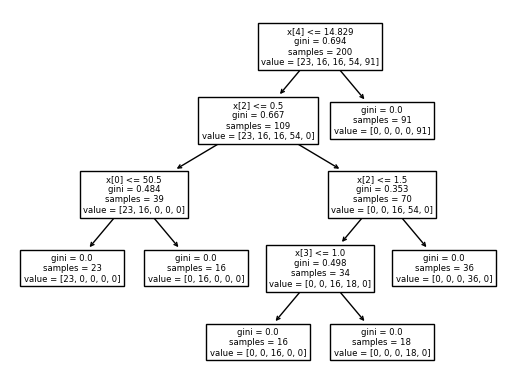

In [10]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)
plot_tree(dtree)

In [11]:
print(df['Drug'].value_counts())

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64


In [12]:
print(dtree.predict([[68, 0, 2, 2, 27.10]]))
# ['drugY'] will be the output

['drugY']


c:\Users\kizzah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [13]:
# Save the model
joblib_file = "DecisionTreeModel.joblib"
joblib.dump(dtree, joblib_file) 

['DecisionTreeModel.joblib']